In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [3]:
ds = datasets.fetch_openml('mnist_784')

In [4]:
type(ds)

sklearn.utils.Bunch

In [5]:
dir(ds)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [6]:
ds.url

'https://www.openml.org/d/554'

In [7]:
type(ds.data),type(ds.feature_names),type(ds.target),type(ds.target_names)

(numpy.ndarray, list, numpy.ndarray, list)

In [8]:
ds.data.size

54880000

In [9]:
ds.data.shape

(70000, 784)

In [10]:
ds.feature_names

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

In [11]:
ds.details

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [12]:
type(ds.target),type(ds.target_names)

(numpy.ndarray, list)

In [13]:
ds.target[0:5]

array(['5', '0', '4', '1', '9'], dtype=object)

### Naive Bayes Classification

##### Gaussian Naive Bayes Classifier

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

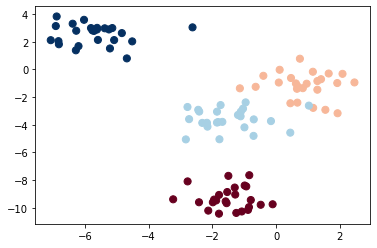

In [15]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=4, random_state=2, cluster_std=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
rng = np.random.RandomState(0)
Xnew = [-7, -10] + [10, 14] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

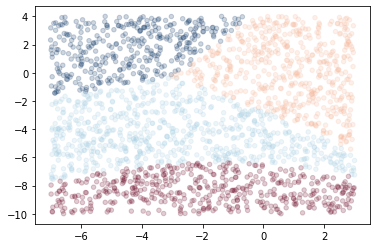

In [18]:
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.2)

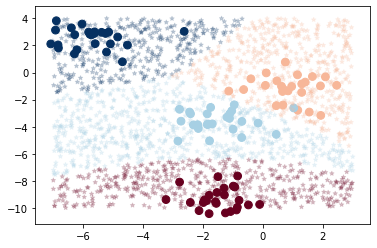

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap='RdBu')
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', marker="*", alpha=0.2)

### Polynomial Features

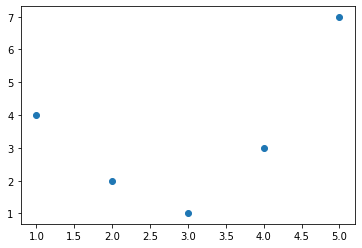

In [20]:
import numpy as np
import matplotlib.pyplot as plt

my_x = np.array([1, 2, 3, 4, 5])
my_y = np.array([4, 2, 1, 3, 7])
plt.scatter(my_x, my_y)

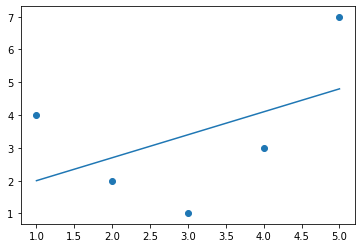

In [21]:
from sklearn.linear_model import LinearRegression
my_X = my_x.reshape(-1,1)
#print(my_X.shape,my_x.shape)
lr_model = LinearRegression().fit(my_X, my_y)
yfit = lr_model.predict(my_X)
plt.scatter(my_x, my_y)
plt.plot(my_x, yfit)
#print(my_x,yfit,my_y)

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4, include_bias=False)
X2 = poly.fit_transform(my_X)
print(X2)

[[  1.   1.   1.   1.]
 [  2.   4.   8.  16.]
 [  3.   9.  27.  81.]
 [  4.  16.  64. 256.]
 [  5.  25. 125. 625.]]


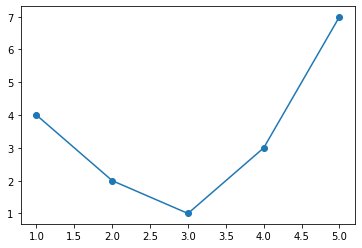

In [23]:
lr_model = LinearRegression().fit(X2, my_y)
yfit_poly = lr_model.predict(X2)
plt.scatter(my_x, my_y)
plt.plot(my_x, yfit_poly)

In [24]:
# distance metrics
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html
# confusion metrics
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html